# Part D

### This is the Fourth Part of the Capstone Project of the 'Introduction to Deep Learning & Neural Networks with Keras

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

First, we scale the data by substracting the mean and dividing by the standard deviation

In [2]:
X = concrete_data.drop(['Strength'], axis = 1) # Inputs
y = concrete_data['Strength'] # Targets
X_norm = (X - X.mean()) / X.std()

In this case, we use 3 hidden layers with 10 units

In [3]:
from keras.models import Sequential
from keras.layers import Dense
keras.backend.clear_session() # We delete any possible previous session.

def regression_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=X_train.shape[1:]))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Using TensorFlow backend.


In [4]:
mse_list = []
for i in range(50):
    print('Loop {} out of 50'.format(i+1))
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)
    n_cols = X.shape[1]
    
    keras.backend.clear_session() # We delete any possible previous session.
    model = regression_model()
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    y_pred = model.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred)) 
    
    del model # In order not to store possible weight values, I am deleting the model, so next time it starts over

Loop 1 out of 50
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Loop 2 out of 50
Loop 3 out of 50
Loop 4 out of 50
Loop 5 out of 50
Loop 6 out of 50
Loop 7 out of 50
Loop 8 out of 50
Loop 9 out of 50
Loop 10 out of 50
Loop 11 out of 50
Loop 12 out of 50
Loop 13 out of 50
Loop 14 out of 50
Loop 15 out of 50
Loop 16 out of 50
Loop 17 out of 50
Loop 18 out of 50
Loop 19 out of 50
Loop 20 out of 50
Loop 21 out of 50
Loop 22 out of 50
Loop 23 out of 50
Loop 24 out of 50
Loop 25 out of 50
Loop 26 out of 50
Loop 27 out of 50
Loop 28 out of 50
Loop 29 out of 50
Loop 30 out of 50
Loop 31 out of 50
Loop 32 out of 50
Loop 33 out of 50
Loop 34 out of 50
Loop 35 out of 50
Loop 36 out of 50
Loop 37 out of 50
Loop 38 out of 50
Loop 39 out of 50
Loop 40 out of 50
Loop 41 out of 50
Loop 42 out of 50
Loop 43 out of 50
Loop 44 out of 50
Loop 45 out of 50
Loop 46 out of 50
Loop 47 out of 50
Loop 48 out of 50
Loop 49 out of 50
Loop 50

In [5]:
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)

In [6]:
print("The mean value of the MSE is {:.2f}, and the standard deviation is {:.2f}".format(mse_mean, mse_std))

The mean value of the MSE is 31.08, and the standard deviation is 20.51


Now we can see that the mean MSE is better than the one obtained in sections A and B, but just slightly better than the one obtained in section C.
As indicated by the histogram below, most of the values are around 20, and this indicates that, in this example, increasing the number of layers seems to be a better option than increasing the number of epochs.

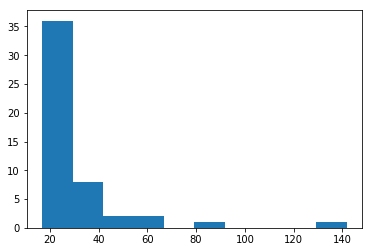

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(mse_list, bins = 10)
plt.show()